# Basics of mobile robotics project - The Thytanic Navigation (2024)

## 1. Introduction & Context

| **Contributors**         | **Sciper**  | **Role**             | **Studies**                                                             |
|---------------------------|-------------|-----------------------|---------------------------------------------------------------------------|
| **Alessio Desogus**       | 301705      | Local Navigation      | Bachelor and Master in Mechanical Engineering.                            |
|   **Antoine Bachmann**    |  336641     | Global navigation      | Bachelor and Master in Computer Science                                   |
|**Ramon Heeb**             |   396213    | Vision                | Bachelor in Computer Science, Master in Robotics                           |
|                           |             |                       |                                                                           |

Date of deliverable: 05.12.2024  

Our main sources were the exercise sessions of the course and ....

### Project Description




### Environment



## 2. Initialization

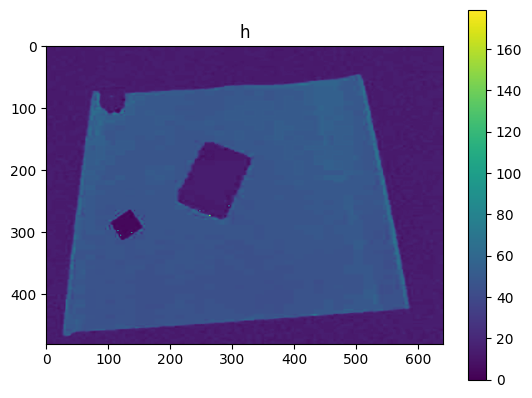

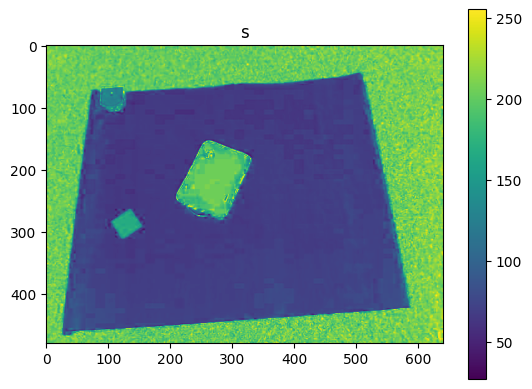

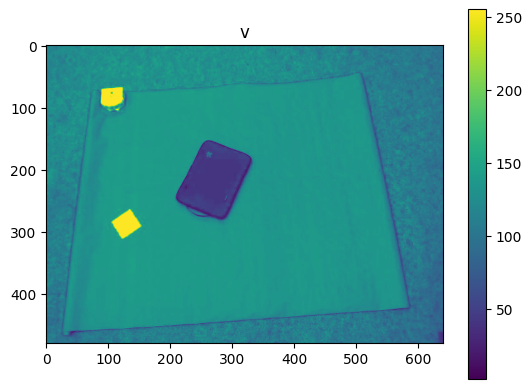

In [1]:
from local_navigation_and_control import ThytanicController, ThytanicState
from vision import get_current_state, init_cam
from global_navigation import downsamplingprep, downsampling, pathfinder
import numpy as np, matplotlib.pyplot as plt

In [2]:
# Initialize the ThytanicController
thytanic = ThytanicController()

## 3. Vision

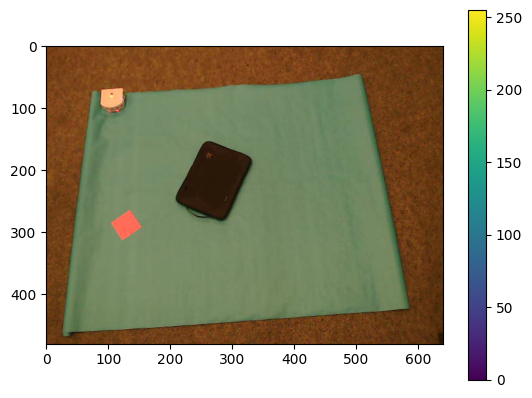

921600
14400


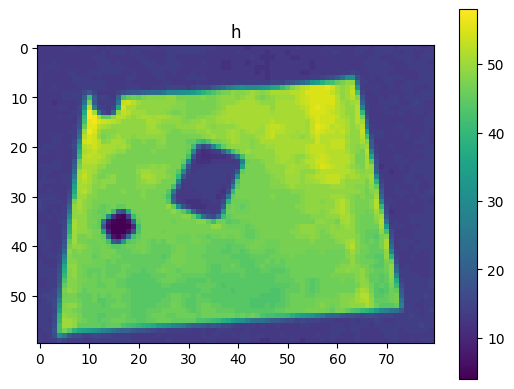

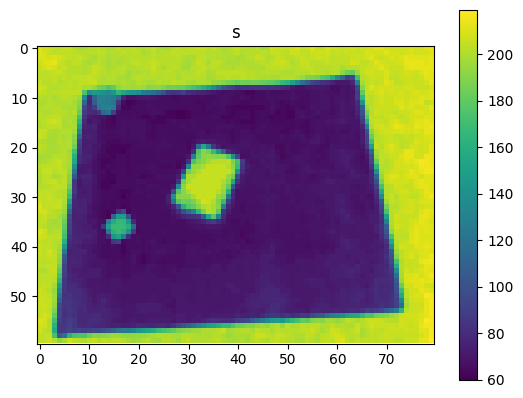

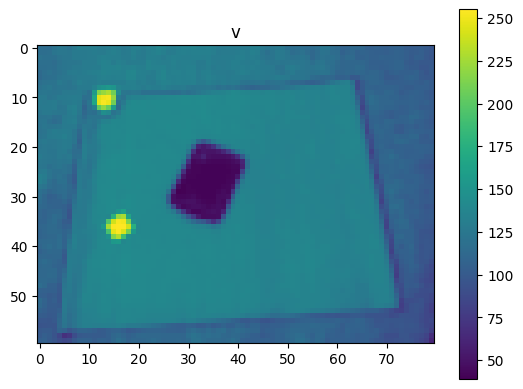

position of front of the thymio
[np.float64(6.336016096579477), np.float64(21.911468812877263)]
position of back of the thymio
[np.float64(nan), np.float64(nan)]
nan


c:\Users\ramon\anaconda3\envs\mob_rob\Lib\site-packages\numpy\lib\_function_base_impl.py:562: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\ramon\anaconda3\envs\mob_rob\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


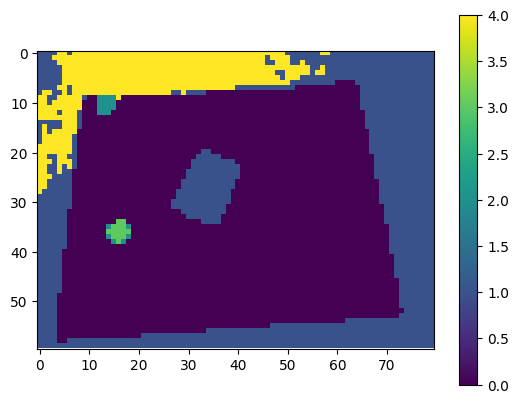

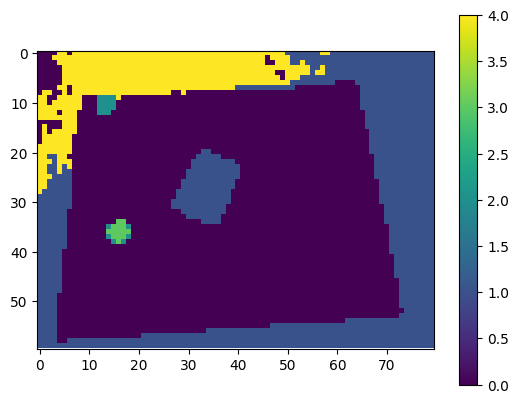

In [ ]:
#turn the image into a 4-channel map
cam = init_cam()
img, _ = get_current_state(
    cam=cam,
    obstacle_range=[np.array([0, 150, 25]), np.array([30, 220, 100])],
    target_range=[np.array([10, 80, 245]), np.array([25, 120, 256])],
    th_back_range=[np.array([0, 180, 250]), np.array([15, 240, 256])],
    th_front_range=[np.array([16, 180, 150]), np.array([35, 230, 200])],
)

## 4. Global Navigation


[]

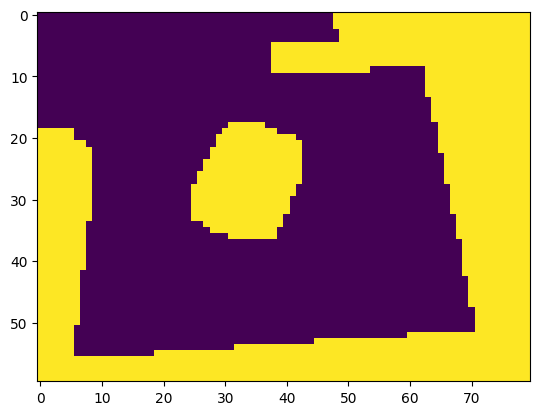

In [4]:
endsize = [60, 80]

#this line generates the original enposition, thymio position, and the obstacle channel
thymiopos, endpos, obstacleimage = downsamplingprep(img, endsize, 1, 1)

#this line turns obstacleimage into its downsampled version with enlarged obstacles
preppedimage = downsampling(obstacleimage, endsize, 5, 0.2)


plt.imshow(preppedimage)
plt.plot()

[]

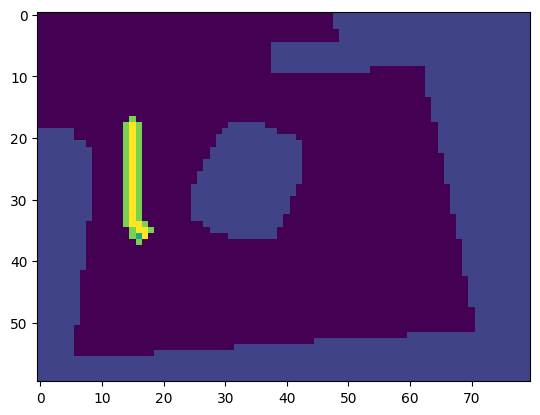

In [5]:
path, exploredpoints, unexploredpoints = pathfinder(thymiopos, endpos, preppedimage)

testimage = preppedimage.copy()

for k in path:
    testimage[k[0], k[1]] += 2
    
for k in exploredpoints:
    testimage[k[0], k[1]] += 3

for k in unexploredpoints:
    testimage[k[0], k[1]] += 4


plt.imshow(testimage)
plt.plot()

## 5. Kalman Filter

## 6. Local Navigation

![Local Navigation Algorithm](img/local_nav.png)

In [ ]:
# Main script to establish connection and start movement
try:
    print("Connecting to Thytanic...")
    thytanic.establish_connection()
    print("Connection established!")

    # Set the robot to GLOBAL_MOVEMENT state
    thytanic.robot_state = ThytanicState.GLOBAL_MOVEMENT
    thytanic.set_wheel_speed(100, 100)
    print("Thytanic state set to GLOBAL_MOVEMENT.")

    # Start the robot movement loop
    while True:
        thytanic.update_robot_state()

        # Print the proximity sensor values
        sensor_values = thytanic.read_proximity_sensors()
        print("Proximity sensor readings -- threshold of 2000 for detection:", sensor_values)

except KeyboardInterrupt:
    # Handle interruption and stop the robot safely
    print("\nStopping the Thytanic...")
    thytanic.disconnect()
    print("Thytanic stopped and disconnected.")

finally:
    print("Session ended.")

Connecting to Thytanic...
Connection established!
Thytanic state set to GLOBAL_MOVEMENT.
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 182

## 7. Main Loop

## 8. Stopping

## 9. Conclusion